In [2]:
import numpy as np
np.set_printoptions(precision=3)
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statistics as stat
from scipy import stats

So far we talked about discrete stochastic variables and distributions. We aslo talked about cumulative distributions.

Text(0, 0.5, 'cumulative relative frequency')

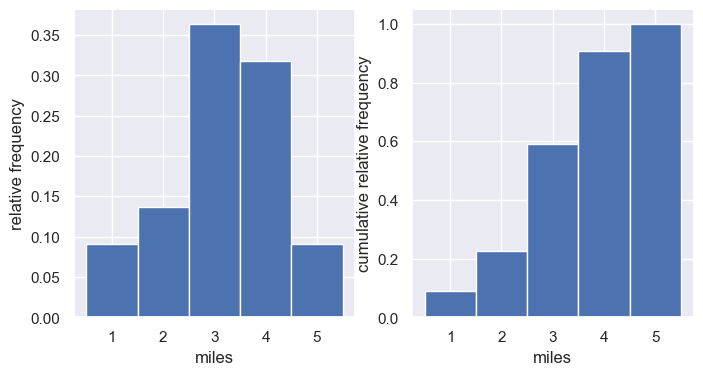

In [5]:
data=[1,1,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,5,5]

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(8,4))
ax1.hist(data, bins = np.arange(1,7), density=True, align='left',cumulative=False)
ax2.hist(data, bins = np.arange(1,7), density=True, align='left',cumulative=True)
ax1.set_xlabel('miles')
ax1.set_ylabel('relative frequency')
ax2.set_xlabel('miles')
ax2.set_ylabel('cumulative relative frequency')

Let's now consider continuus variables. Examples? 

Categporical:

Discrete quantitative:

Continuous quantitative:



The SciPy statistics library has very handy collection of continuous distributions.

In [8]:


#let's try the normal distribution
#stats.norm. #and press tab to see all of the methods for this distribution

#let's first create random variates, i.e. a bunch of numbers, distributed according to this distribution

data=stats.norm.rvs(size=3)
data

array([ 1.783,  0.398, -0.334])

(array([0.005, 0.014, 0.06 , 0.187, 0.338, 0.413, 0.309, 0.182, 0.044,
        0.019]),
 array([-3.459, -2.822, -2.185, -1.549, -0.912, -0.276,  0.361,  0.997,
         1.634,  2.271,  2.907]),
 <BarContainer object of 10 artists>)

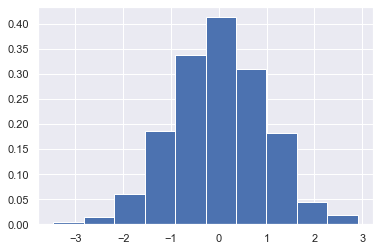

In [24]:
data=stats.norm.rvs(size=1000)
plt.hist(data,density=True)

0.009881499562080186 0.9773798206803128


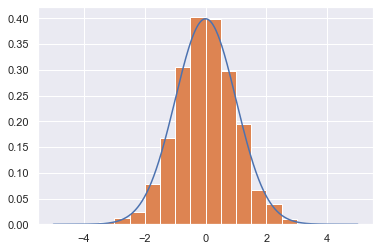

In [42]:
#Change the number of bins
mean=np.mean(data)
std=np.std(data)
x=np.linspace(-5,5,1000)
#norm_pdf=stats.norm(x)
plt.plot(x,stats.norm.pdf(x))
plt.hist(data,density=True,bins=np.arange(-5,5,0.5))
print(mean,std)

This is by defailt a normal distribution with $<x>=0.0$ and $\sigma=1.0$. 

In other words, the function of the probability density function is:

$f(x)=\frac{e^{-\frac{x^2}{2}}}{\sqrt{2\pi}}$

(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.002, 0.004,
        0.002, 0.006, 0.012, 0.048, 0.058, 0.076, 0.094, 0.138, 0.178,
        0.19 , 0.198, 0.174, 0.17 , 0.136, 0.156, 0.124, 0.076, 0.07 ,
        0.038, 0.03 , 0.008, 0.006, 0.002, 0.002, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ]),
 array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
         0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
         6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
        11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5]),
 <BarContainer object of 39 artists>)

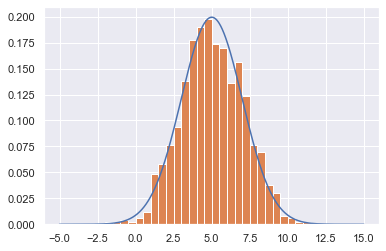

In [10]:
#We can get a general gaussian with non-zero mean and stadndard deviation other than 1.
data=stats.norm.rvs(size=1000,loc=5.0,scale=2.0)
x=np.linspace(-5,15,1000)
#norm_pdf=stats.norm(x)
plt.plot(x,stats.norm.pdf(x,loc=5.0,scale=2.0))
plt.hist(data,density=True,bins=np.arange(-5,15,0.5))
#print(mean,std)

Why are we talking about robability $\bf{density}$?

The parameters of a contunuous distribution are obtained by integrating.

Let's say $x$ is a continuous variable. Let's have the P.D.F. (probability density function of $x$) as $\rho(x)$.

Mean:

$<x>=\int_{-\infty}^{\infty}x\rho(x)dx$

Variance:

$\sigma^2=\int_{-\infty}^{\infty}(x-<x>)^2\rho(x)dx$

In the case of discrete variables these were sums. There was no multiplication with a bin width. Here we multiply with $dx$.

The probability of getting a single number here is zero, since:

$P(x=a)=\int_{a}^{a}\rho(x)dx$

We can only talk about a brobability of the result of sampling a single number to be in an interval:

$P(x\in[a,b])=\int_{a}^{b}\rho(x)dx$

How do we calculate these probabilities numerically? 

Using the cumulative probability density function.

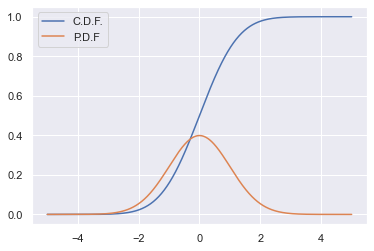

In [14]:
x=np.linspace(-5,5,1000)
#norm_pdf=stats.norm(x)
plt.plot(x,stats.norm.cdf(x),label='C.D.F.')
plt.plot(x,stats.norm.pdf(x),label='P.D.F')
plt.legend()

CDF is defined as:

$F(x)=\int_{-\infty}^{x}\rho(t)dt$

So we can simply have:

$P(x\in[a,b])=\int_{a}^{b}\rho(x)dx=F(b)-F(a)$
